In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [7]:
df = pd.read_csv("Housing.csv")
df.head()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
df.info()
df.isnull().sum()
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [14]:
X = df_numeric.drop("price", axis=1)
y = df_numeric["price"]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
y_pred = model.predict(X_test)


In [18]:
mse_all = mean_squared_error(y_test, y_pred)
r2_all = r2_score(y_test, y_pred)

print("MSE (All Features):", mse_all)
print("R2 Score (All Features):", r2_all)


MSE (All Features): 2292721545725.3613
R2 Score (All Features): 0.5464062355495873



Feature: area


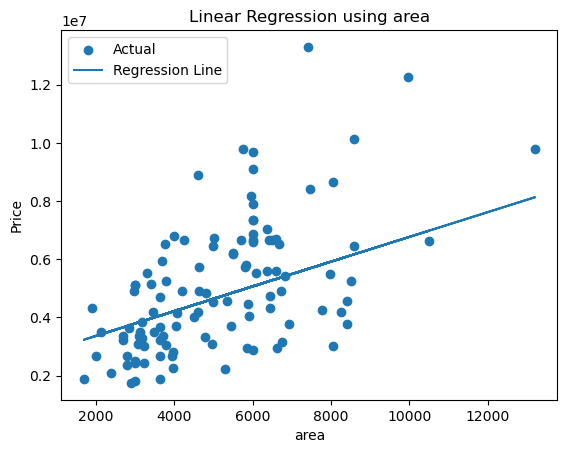

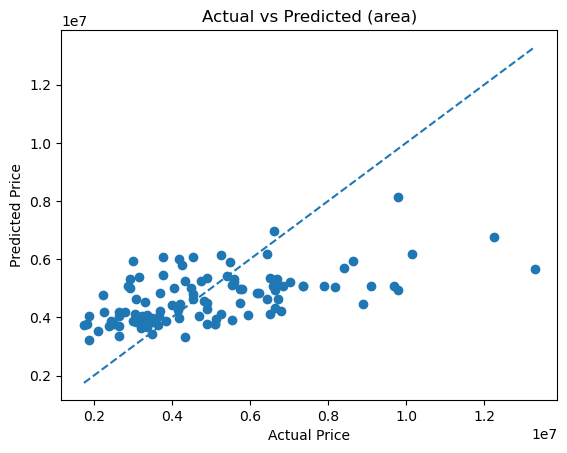

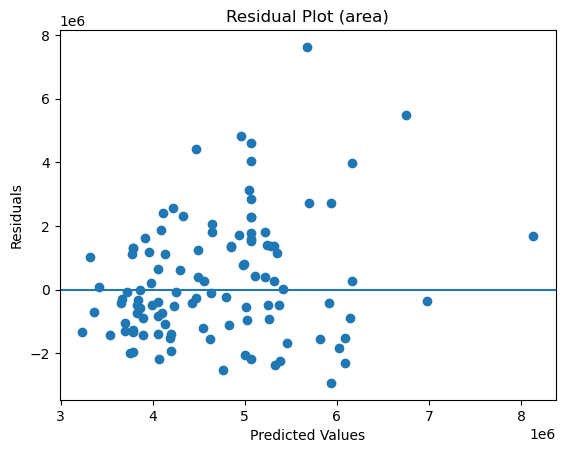


Feature: bedrooms


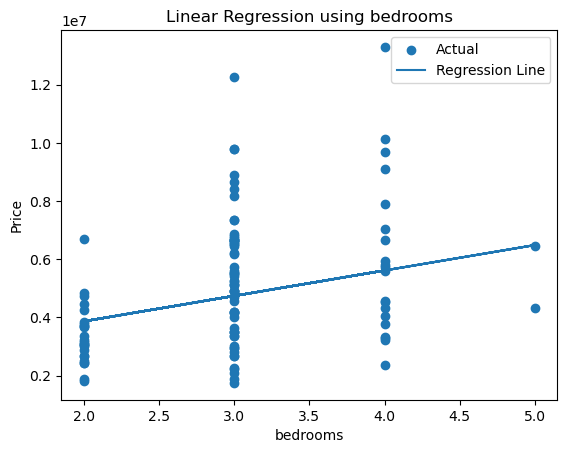

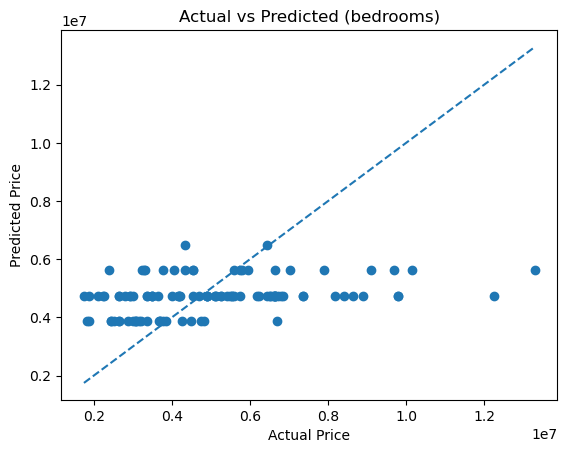

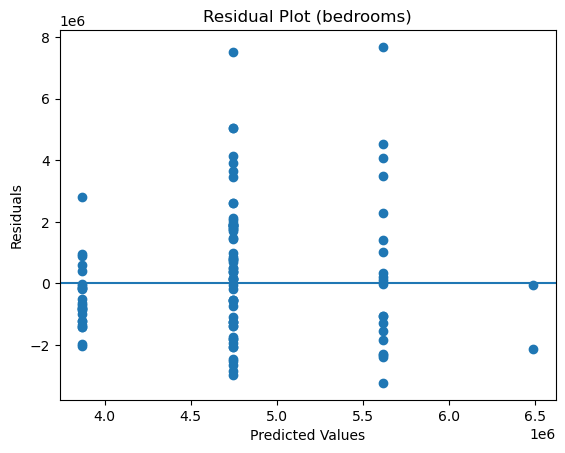


Feature: bathrooms


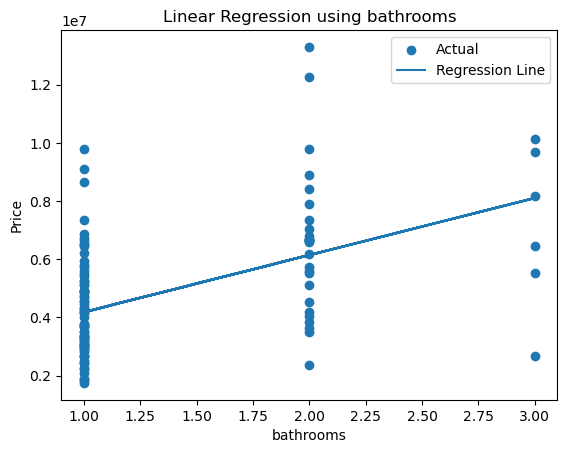

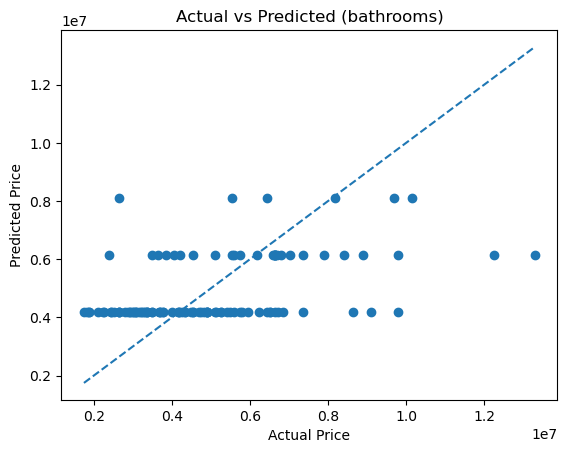

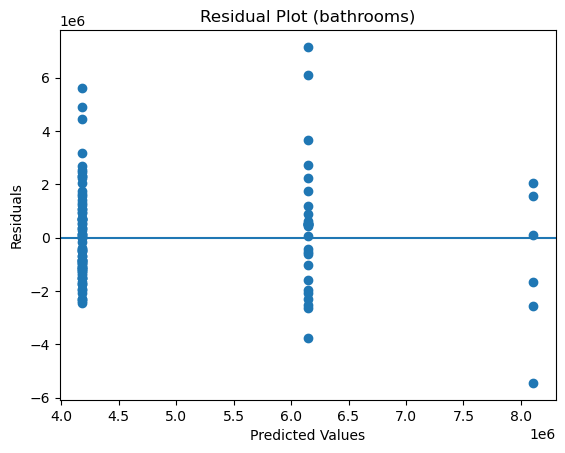


Feature: stories


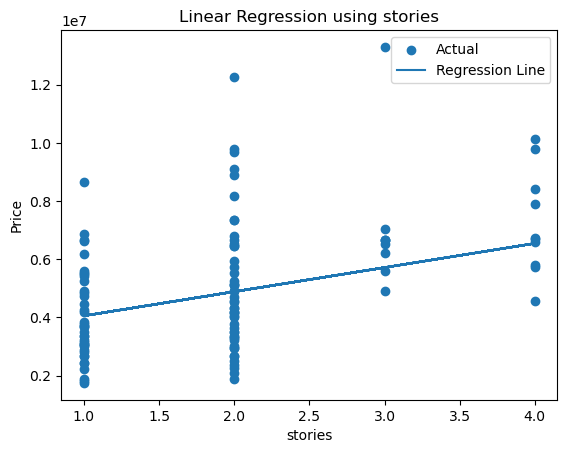

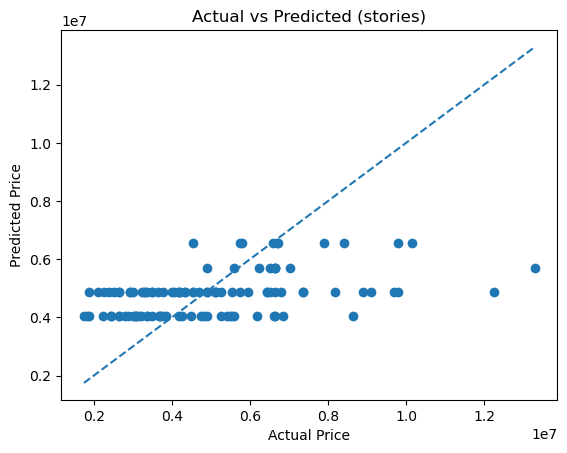

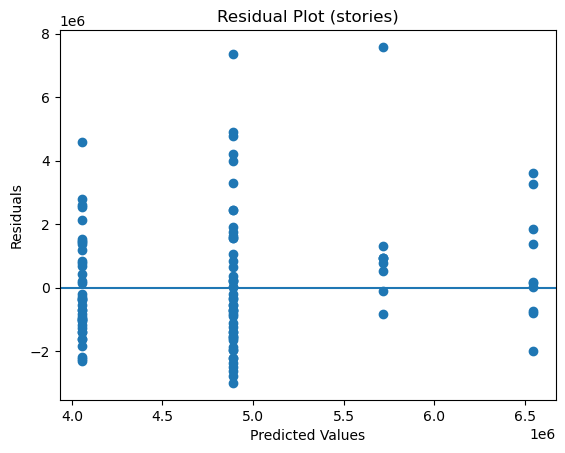


Feature: parking


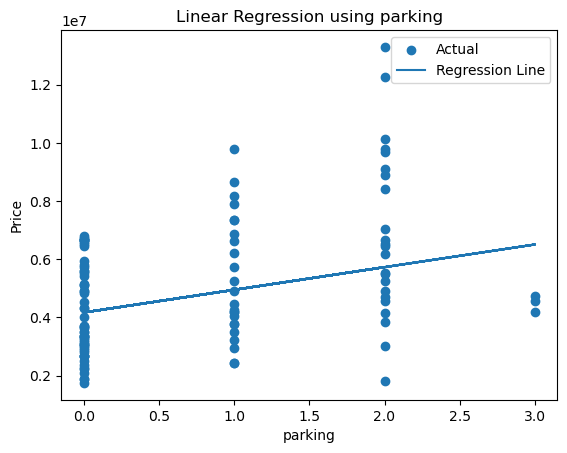

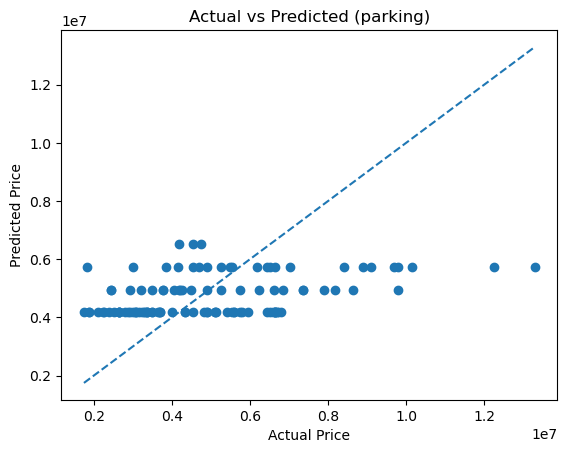

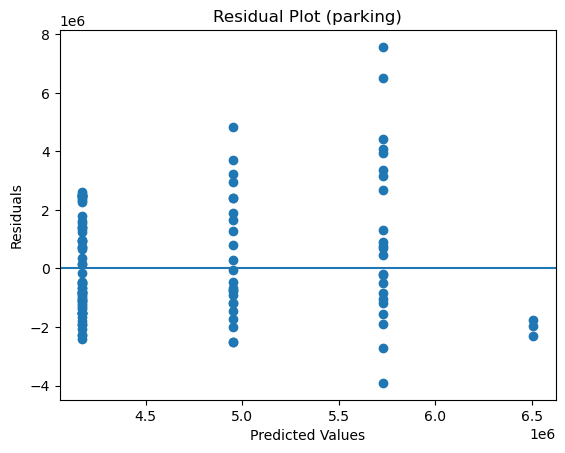

,Feature,MSE,R2 Score
0,area,3.675287e+12,0.272879
1,bedrooms,4.506506e+12,0.108429
2,bathrooms,3.951199e+12,0.218292
3,stories,4.090539e+12,0.190725
4,parking,4.342069e+12,0.140962


In [34]:
results = []

for feature in X.columns:
    print(f"\nFeature: {feature}")
    
    X_single = df_numeric[[feature]]
    
    X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
        X_single, y, test_size=0.2, random_state=42
    )
    
    model_s = LinearRegression()
    model_s.fit(X_train_s, y_train_s)
    
    y_pred_s = model_s.predict(X_test_s)
    
    mse = mean_squared_error(y_test_s, y_pred_s)
    r2 = r2_score(y_test_s, y_pred_s)
    
    results.append((feature, mse, r2))
    
    # -----------------------------
    # Plot 1: Regression Line
    # -----------------------------
    plt.figure()
    plt.scatter(X_test_s, y_test_s, label="Actual")
    plt.plot(X_test_s, y_pred_s, label="Regression Line")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(f"Linear Regression using {feature}")
    plt.legend()
    plt.show()
    
    # -----------------------------
    # Plot 2: Actual vs Predicted
    # -----------------------------
    plt.figure()
    plt.scatter(y_test_s, y_pred_s)
    plt.plot(
        [y_test_s.min(), y_test_s.max()],
        [y_test_s.min(), y_test_s.max()],
        linestyle="--"
    )
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"Actual vs Predicted ({feature})")
    plt.show()
    
    # -----------------------------
    # Plot 3: Residual Plot
    # -----------------------------
    residuals = y_test_s - y_pred_s
    
    plt.figure()
    plt.scatter(y_pred_s, residuals)
    plt.axhline(y=0)
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residual Plot ({feature})")
    plt.show()
results_df = pd.DataFrame(results, columns=["Feature", "MSE", "R2 Score"])
results_df


In [20]:
best_feature = results_df.sort_values(
    by=["R2 Score", "MSE"], ascending=[False, True]
).iloc[0]

best_feature


Feature                     area
MSE         3675286604768.185059
R2 Score                0.272879
Name: 0, dtype: object

In [21]:
feature_name = best_feature["Feature"]

X_best = df_numeric[[feature_name]]

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_best, y, test_size=0.2, random_state=42
)

best_model = LinearRegression()
best_model.fit(X_train_b, y_train_b)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
y_pred_b = best_model.predict(X_test_b)
print("Best Feature:", feature_name)
print("MSE:", mean_squared_error(y_test_b, y_pred_b))
print("R2 Score:", r2_score(y_test_b, y_pred_b))


Best Feature: area
MSE: 3675286604768.185
R2 Score: 0.27287851871974644


In [23]:
coef = best_model.coef_[0]
intercept = best_model.intercept_

print("Coefficient (m):", coef)
print("Intercept (c):", intercept)


Coefficient (m): 425.72984193878284
Intercept (c): 2512254.2639593435


In [24]:
print(f"Regression Equation:\nPrice = {coef:.2f} * {feature_name} + {intercept:.2f}")


Regression Equation:
Price = 425.73 * area + 2512254.26


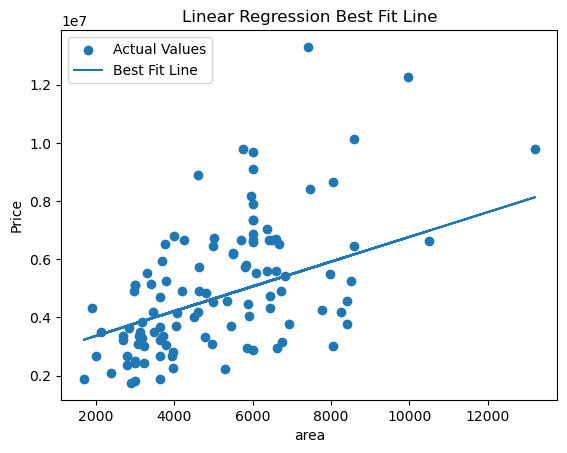

In [31]:
plt.figure()
plt.scatter(X_test_b, y_test_b, label="Actual Values")
plt.plot(X_test_b, y_pred_b, label="Best Fit Line")
plt.xlabel(feature_name)
plt.ylabel("Price")
plt.title("Linear Regression Best Fit Line")
plt.legend()
plt.show()


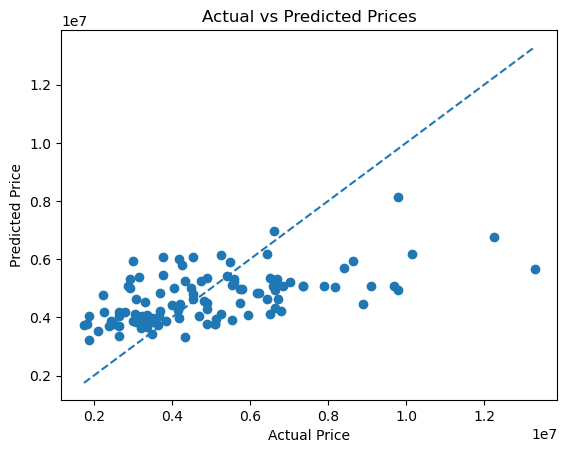

In [32]:
plt.figure()
plt.scatter(y_test_b, y_pred_b)
plt.plot([y_test_b.min(), y_test_b.max()],
         [y_test_b.min(), y_test_b.max()],
         linestyle="--")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()


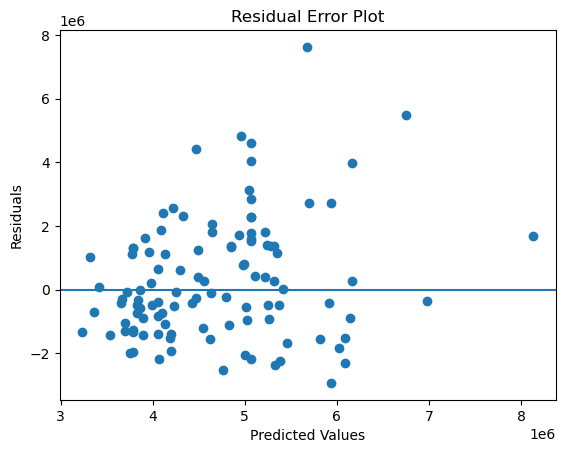

In [33]:
plt.figure()
plt.scatter(y_pred_b, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Error Plot")
plt.show()
